In [1]:
import numpy as np
import matplotlib.pyplot as plt
import librosa
import librosa.display
import scipy.signal as signal
from IPython.display import Audio, display

# Load the audio files
male_path = "males/1070.wav"
female_path = "females/1700.wav"

male_audio, male_sr = librosa.load(male_path, sr=None)
print("🔊 Play Male Voice (Bấm để nghe giọng nam):")
display(Audio(male_audio, rate=male_sr))

female_audio, female_sr = librosa.load(female_path, sr=None)
print("🔊 Play Female Voice (Bấm để nghe giọng nữ):")
display(Audio(female_audio, rate=female_sr))

🔊 Play Male Voice (Bấm để nghe giọng nam):


🔊 Play Female Voice (Bấm để nghe giọng nữ):


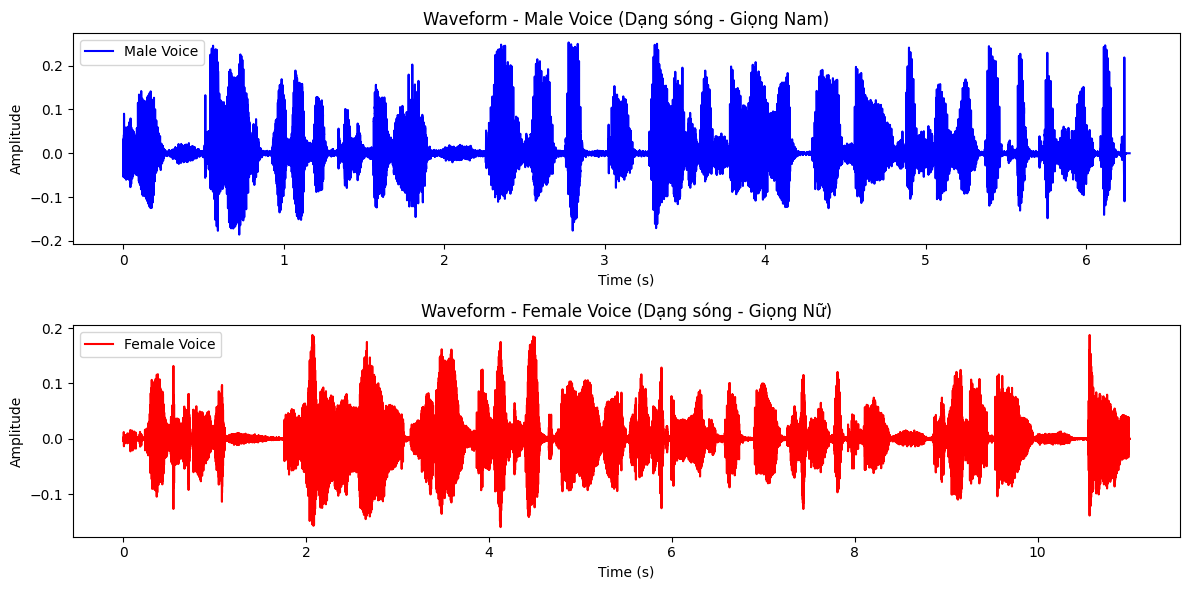

In [2]:

# Time axis
time_male = np.linspace(0, len(male_audio) / male_sr, num=len(male_audio))
time_female = np.linspace(0, len(female_audio) / female_sr, num=len(female_audio))

# Plot Waveforms
plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plt.plot(time_male, male_audio, label="Male Voice", color='blue')
plt.title("Waveform - Male Voice (Dạng sóng - Giọng Nam)")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(time_female, female_audio, label="Female Voice", color='red')
plt.title("Waveform - Female Voice (Dạng sóng - Giọng Nữ)")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.legend()
plt.tight_layout()
plt.show()

# Biểu đồ sóng (Waveform)
# - Giọng nam có biên độ thấp hơn, dao động chậm hơn
# - Giọng nữ có biên độ cao hơn, dao động nhanh hơn


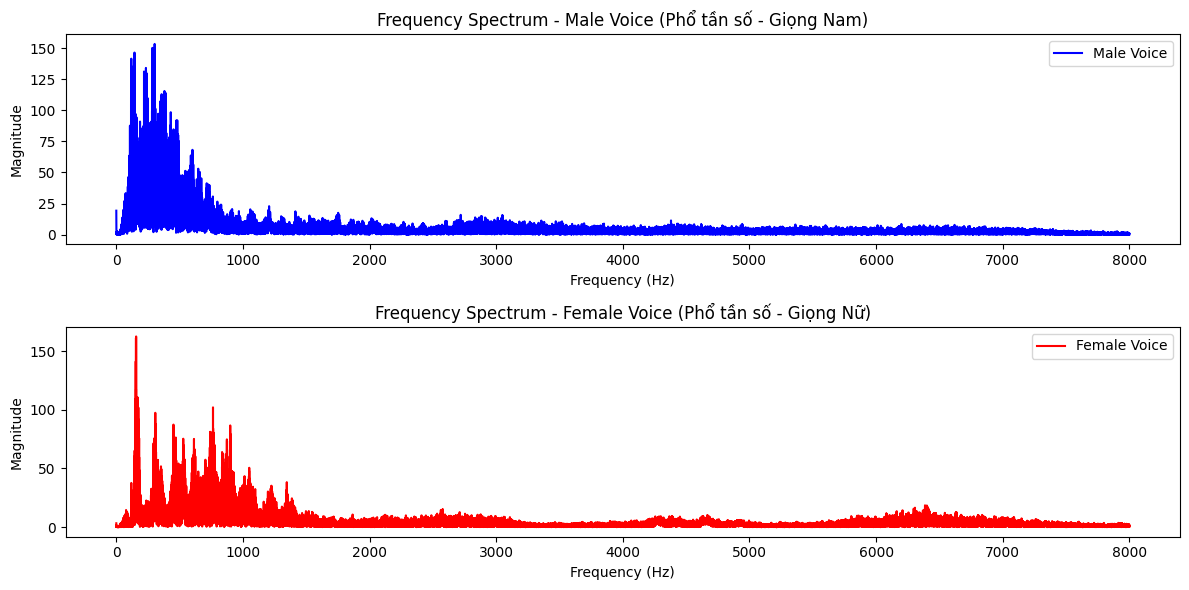

In [3]:

# Compute and plot FFT
male_fft = np.abs(np.fft.rfft(male_audio))
male_freqs = np.fft.rfftfreq(len(male_audio), 1/male_sr)

female_fft = np.abs(np.fft.rfft(female_audio))
female_freqs = np.fft.rfftfreq(len(female_audio), 1/female_sr)

plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plt.plot(male_freqs, male_fft, label="Male Voice", color='blue')
plt.title("Frequency Spectrum - Male Voice (Phổ tần số - Giọng Nam)")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude")
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(female_freqs, female_fft, label="Female Voice", color='red')
plt.title("Frequency Spectrum - Female Voice (Phổ tần số - Giọng Nữ)")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude")
plt.legend()
plt.tight_layout()
plt.show()

# Phổ tần số (FFT)
# - Giọng nam có tần số chính khoảng 100Hz
# - Giọng nữ có tần số chính kh oảng 200Hz
# - Giọng nữ suy giảm nhanh hơn ở tần số cao

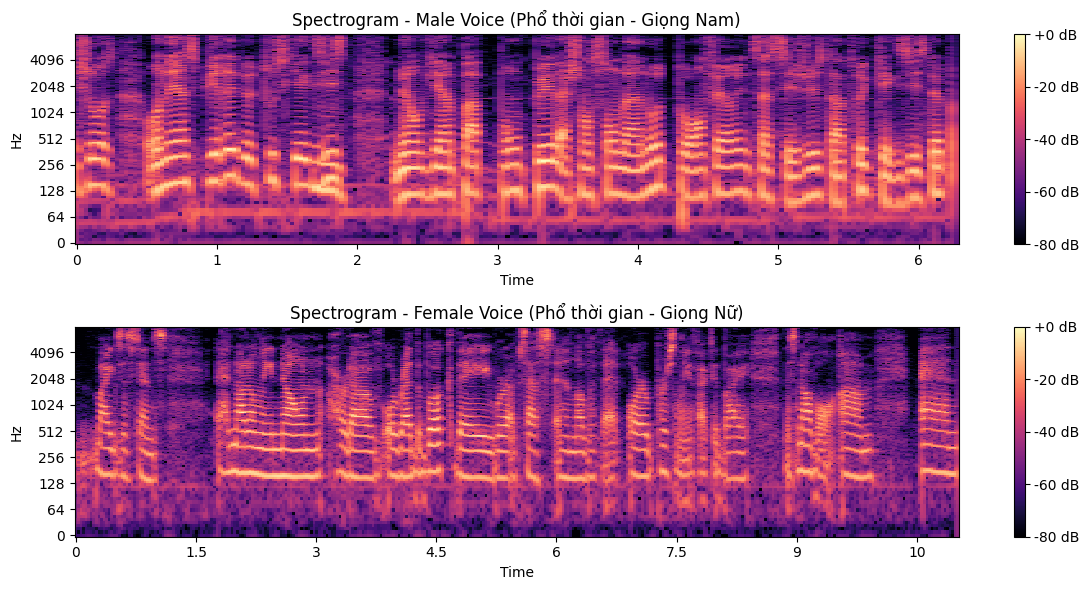

In [4]:

# Compute and plot spectrogram
plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
D_male = librosa.amplitude_to_db(np.abs(librosa.stft(male_audio)), ref=np.max)
librosa.display.specshow(D_male, sr=male_sr, x_axis='time', y_axis='log')
plt.title("Spectrogram - Male Voice (Phổ thời gian - Giọng Nam)")
plt.colorbar(format='%+2.0f dB')

plt.subplot(2, 1, 2)
D_female = librosa.amplitude_to_db(np.abs(librosa.stft(female_audio)), ref=np.max)
librosa.display.specshow(D_female, sr=female_sr, x_axis='time', y_axis='log')
plt.title("Spectrogram - Female Voice (Phổ thời gian - Giọng Nữ)")
plt.colorbar(format='%+2.0f dB')
plt.tight_layout()
plt.show()

# Phổ thời gian (Spectrogram)
# - Giọng nam có nhiều năng lượng ở tần số thấp
# - Giọng nữ có nhiều năng lượng ở tần số cao



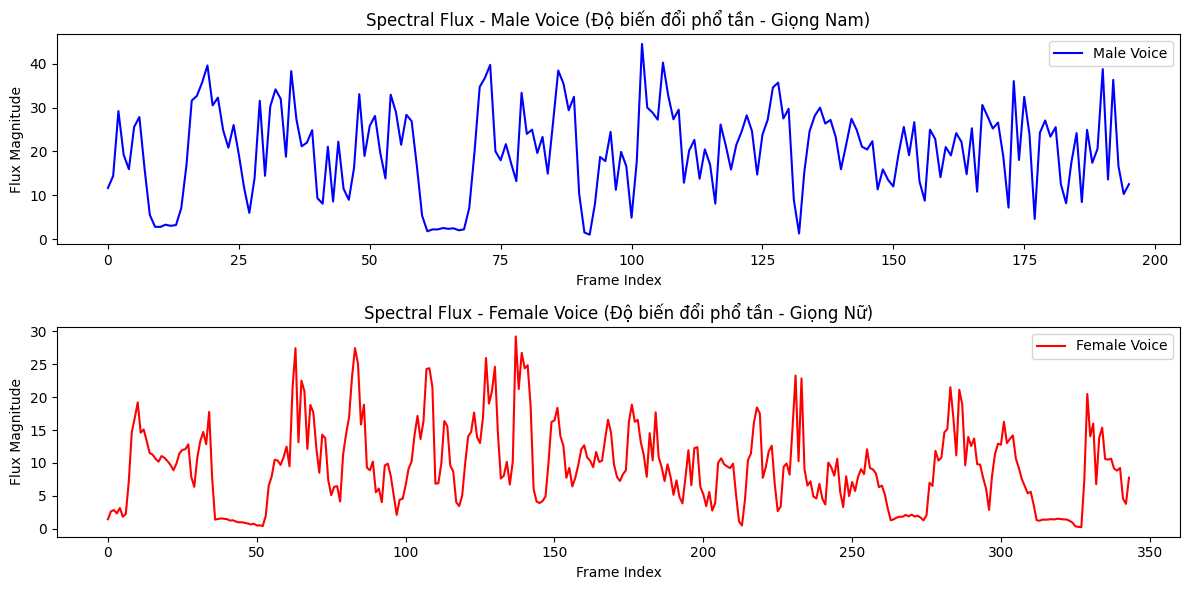

In [5]:

# Compute Spectral Flux (Feature used in the paper)
def spectral_flux(audio, sr):
    stft = np.abs(librosa.stft(audio))
    flux = np.sqrt(np.sum(np.diff(stft, axis=1) ** 2, axis=0))
    return flux

male_flux = spectral_flux(male_audio, male_sr)
female_flux = spectral_flux(female_audio, female_sr)

plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plt.plot(male_flux, label="Male Voice", color='blue')
plt.title("Spectral Flux - Male Voice (Độ biến đổi phổ tần - Giọng Nam)")
plt.xlabel("Frame Index")
plt.ylabel("Flux Magnitude")
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(female_flux, label="Female Voice", color='red')
plt.title("Spectral Flux - Female Voice (Độ biến đổi phổ tần - Giọng Nữ)")
plt.xlabel("Frame Index")
plt.ylabel("Flux Magnitude")
plt.legend()
plt.tight_layout()
plt.show()

# Độ biến đổi phổ tần (Spectral Flux)
# - Giọng nam có sự thay đổi tần số nhẹ hơn, đường cong mượt hơn
# - Giọng nữ có dao động lớn hơn, nhiều biến đổi hơn